In [323]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt



In [324]:
df = pd.read_excel('survey_new.xlsx')

In [325]:
df.head()

,Age,Gender,Profession,Healthy Lifestyle Importance (1-5),Factors Considered for Purchasing a Drink,Likelihood to Try New Drink,Importance of Supporting Responsible Brands
0,17,Female,Student,5,2. Health Benefits,Neutral,Moderately important
1,33,Female,Teacher,4,4. Energy Boost,Neutral,Extremely important
2,28,Female,Teacher,4,2. Health Benefits,Likely,Slightly important
3,29,Female,Designer,2,4. Energy Boost,Likely,Not at all important
4,27,Male,Engineer,4,4. Energy Boost,Likely,Slightly important


In [326]:
missing_values = df.isnull()

missing_counts = df.isnull().sum()
rows_with_missing_values = df[df.isnull().any(axis=1)]
missing_counts


Age                                            0
Gender                                         0
Profession                                     0
Healthy Lifestyle Importance (1-5)             0
Factors Considered for Purchasing a Drink      0
Likelihood to Try New Drink                    0
Importance of Supporting Responsible Brands    0
dtype: int64

In [327]:
#EDA

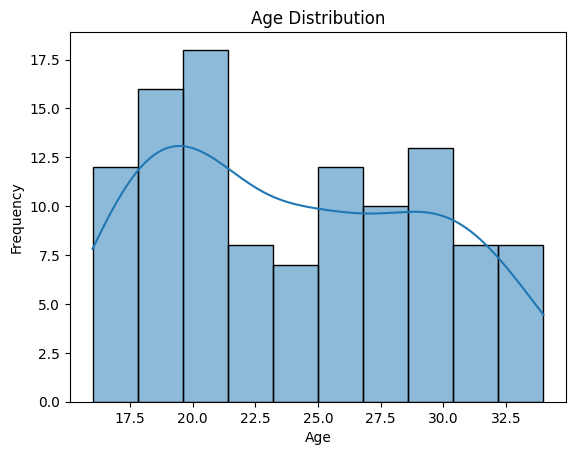

In [328]:
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#Histogram of age distribution

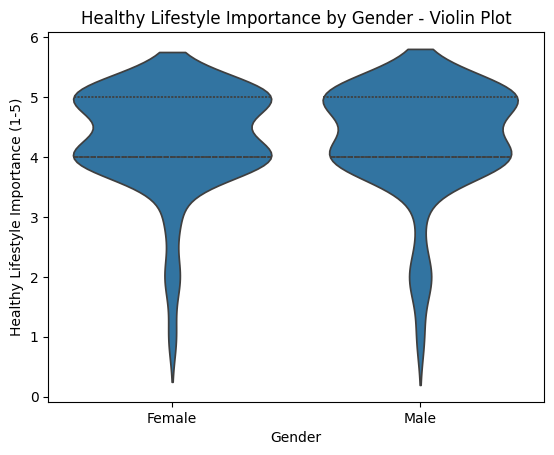

In [329]:
#Box line diagram of the importance of a healthy lifestyle, by gender
sns.violinplot(x='Gender', y='Healthy Lifestyle Importance (1-5)', data=df, inner='quartile')
plt.title('Healthy Lifestyle Importance by Gender - Violin Plot')
plt.show()


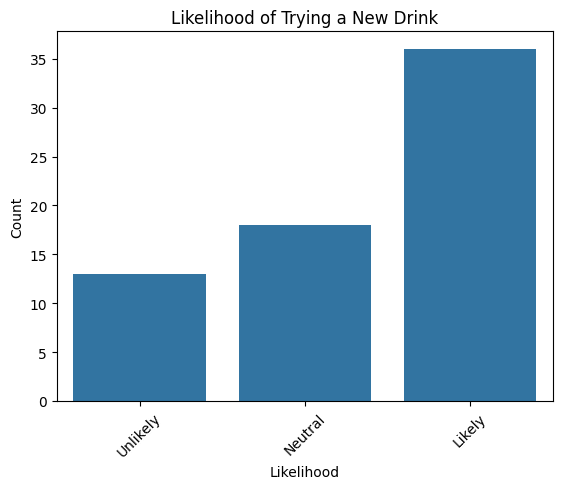

In [330]:
sns.countplot(x='Likelihood to Try New Drink', data=df, order=['Unlikely', 'Neutral', 'Likely'])
plt.title('Likelihood of Trying a New Drink')
plt.xlabel('Likelihood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
##Bar chart for trying new drink possibilities

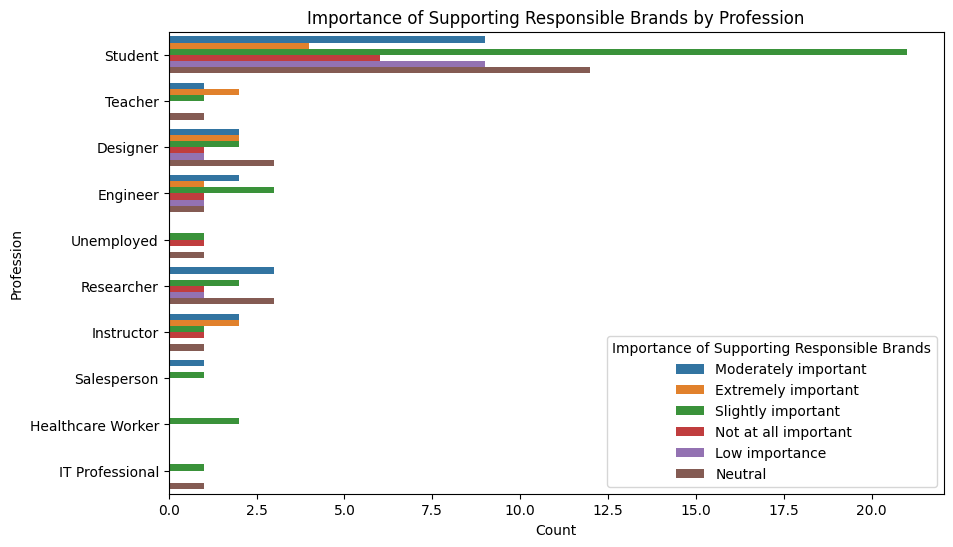

In [331]:
#The Importance of Supporting Responsible Branding by Occupation
plt.figure(figsize=(10, 6))
sns.countplot(y='Profession', hue='Importance of Supporting Responsible Brands', data=df)
plt.title('Importance of Supporting Responsible Brands by Profession')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()


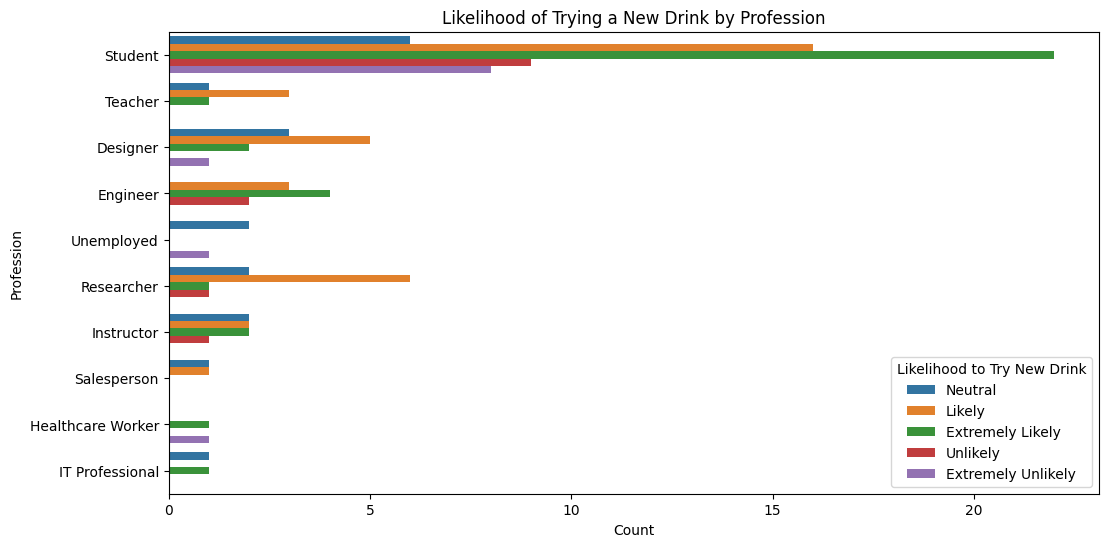

In [332]:
#Relationship between careers and the possibility of trying new beverages
plt.figure(figsize=(12, 6))
sns.countplot(y='Profession', hue='Likelihood to Try New Drink', data=df)
plt.title('Likelihood of Trying a New Drink by Profession')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.legend(title='Likelihood to Try New Drink', loc='lower right')
plt.show()


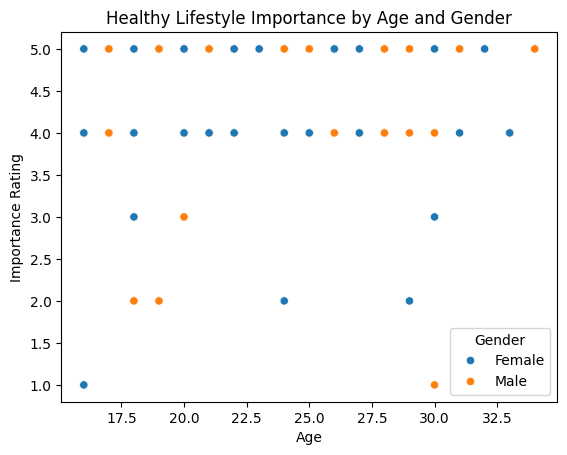

In [333]:
#Relationship between age and the importance of a healthy lifestyle
sns.scatterplot(x='Age', y='Healthy Lifestyle Importance (1-5)', hue='Gender', data=df)
plt.title('Healthy Lifestyle Importance by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Importance Rating')
plt.show()


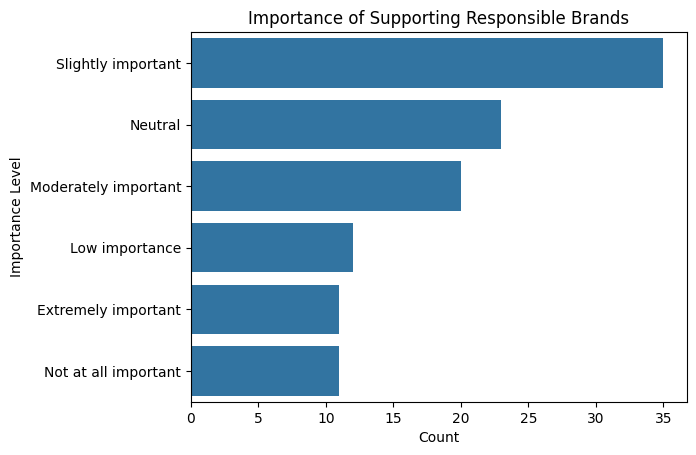

In [334]:
#Distribution of importance of supporting responsible brands
sns.countplot(y='Importance of Supporting Responsible Brands', data=df, order=df['Importance of Supporting Responsible Brands'].value_counts().index)
plt.title('Importance of Supporting Responsible Brands')
plt.xlabel('Count')
plt.ylabel('Importance Level')
plt.show()


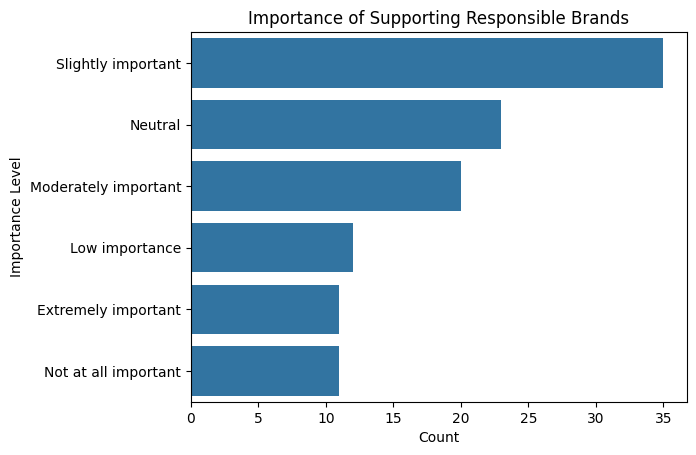

In [335]:
#Distribution of top imp
sns.countplot(y='Importance of Supporting Responsible Brands', data=df, order=df['Importance of Supporting Responsible Brands'].value_counts().index)
plt.title('Importance of Supporting Responsible Brands')
plt.xlabel('Count')
plt.ylabel('Importance Level')
plt.show()

In [336]:
#DATA PROCESSING

In [337]:
def extract_top_factor(factors_str):
    factors_list = factors_str.split(', ')
    top_factor_rank = factors_list[0].split('. ')[0]
    return int(top_factor_rank)

In [338]:
#df['Top Factor'] = df['Factors Considered for Purchasing a Drink'].apply(extract_top_factor)


In [339]:
#df.drop('Importance of Supporting Responsible Brands', axis=1, inplace=True)


In [340]:
mapping = {
    'Not at all important': 1,
    'Low importance': 2,
    'Slightly important': 3,
    'Neutral': 4,
    'Moderately important': 5,
    'Extremely important': 6
}

df['importance_numeric'] = df['Importance of Supporting Responsible Brands'].map(mapping)

In [341]:
df = pd.get_dummies(df, columns=['Gender', 'Likelihood to Try New Drink', 'Factors Considered for Purchasing a Drink', 'Profession'], drop_first=True)


In [342]:
df.drop(['Likelihood to Try New Drink_Neutral', 'Likelihood to Try New Drink_Unlikely', 'Importance of Supporting Responsible Brands'], axis=1, inplace=True)


In [343]:
print(df.head())


   Age  Healthy Lifestyle Importance (1-5)  importance_numeric  Gender_Male  \
0   17                                   5                   5            0   
1   33                                   4                   6            0   
2   28                                   4                   3            0   
3   29                                   2                   1            0   
4   27                                   4                   3            1   

   Likelihood to Try New Drink_Extremely Unlikely  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Likelihood to Try New Drink_Likely  \
0                                   0   
1                                   0   
2                                   1   
3                                   1   
4

In [344]:
column_names = df.columns.tolist()

# 打印列名
print("列名列表:")
for column_name in column_names:
    print(column_name)

列名列表:
Age
Healthy Lifestyle Importance (1-5)
importance_numeric
Gender_Male
Likelihood to Try New Drink_Extremely Unlikely
Likelihood to Try New Drink_Likely
Factors Considered for Purchasing a Drink_2. Health Benefits
Factors Considered for Purchasing a Drink_3. Unique Flavors
Factors Considered for Purchasing a Drink_4. Energy Boost
Factors Considered for Purchasing a Drink_5. None of the Above
Profession_Engineer
Profession_Healthcare Worker
Profession_IT Professional
Profession_Instructor
Profession_Researcher
Profession_Salesperson
Profession_Student
Profession_Teacher
Profession_Unemployed


In [345]:
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [346]:
print(df.head())

   Age  Healthy Lifestyle Importance (1-5)  importance_numeric  Gender_Male  \
0   17                                   5                   5            0   
1   33                                   4                   6            0   
2   28                                   4                   3            0   
3   29                                   2                   1            0   
4   27                                   4                   3            1   

   Likelihood to Try New Drink_Extremely Unlikely  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Likelihood to Try New Drink_Likely  \
0                                   0   
1                                   0   
2                                   1   
3                                   1   
4

In [347]:
#Building model

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [349]:
X = df.drop(['Likelihood to Try New Drink_Likely','Likelihood to Try New Drink_Extremely Unlikely'], axis=1)
Y = df['Likelihood to Try New Drink_Likely']

In [393]:
columns_to_normalize = ['Age', 'Healthy Lifestyle Importance (1-5)', 'importance_numeric']
columns_to_keep = [col for col in df.columns if col not in columns_to_normalize]

data_to_normalize = df[columns_to_normalize]
data_to_keep = df[columns_to_keep]

norm  = preprocessing.normalize(data_to_normalize)

df_scaled = pd.DataFrame(norm, columns=columns_to_normalize)
df_new = pd.concat([data_to_keep, df_scaled], axis=1)

In [394]:
X = df_new.drop(['Likelihood to Try New Drink_Likely','Likelihood to Try New Drink_Extremely Unlikely'], axis=1)
Y = df_new['Likelihood to Try New Drink_Likely']

In [395]:
# Model 1: demographic

In [396]:
X = sm.add_constant(X)
model_mult = sm.OLS(Y, X).fit()
print(model_mult.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Likelihood to Try New Drink_Likely   R-squared:                       0.149
Model:                                            OLS   Adj. R-squared:                 -0.005
Method:                                 Least Squares   F-statistic:                    0.9692
Date:                                Sat, 24 Feb 2024   Prob (F-statistic):              0.499
Time:                                        23:19:04   Log-Likelihood:                -64.603
No. Observations:                                 112   AIC:                             165.2
Df Residuals:                                      94   BIC:                             214.1
Df Model:                                          17                                         
Covariance Type:                            nonrobust                                         
                                                  

In [397]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [398]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)

LogisticRegression()

In [399]:
Y_pred = log_reg_model.predict(X_test)


In [400]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [401]:
print("acc:", accuracy)
print("\matrix:\n", conf_matrix)
print("\class_report:\n", class_report)

acc: 0.8695652173913043
\matrix:
 [[20  0]
 [ 3  0]]
\class_report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       0.00      0.00      0.00         3

    accuracy                           0.87        23
   macro avg       0.43      0.50      0.47        23
weighted avg       0.76      0.87      0.81        23



In [402]:
from sklearn.ensemble import RandomForestClassifier


In [403]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [404]:
Y_pred_rf = rf_model.predict(X_test)

In [405]:
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
class_report_rf = classification_report(Y_test, Y_pred_rf)

In [406]:
print("accuracy_rf:", accuracy_rf)
print("\conf_matrix_rf:\n", conf_matrix_rf)
print("\class_report_rf:\n", class_report_rf)

accuracy_rf: 0.6956521739130435
\conf_matrix_rf:
 [[15  5]
 [ 2  1]]
\class_report_rf:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.17      0.33      0.22         3

    accuracy                           0.70        23
   macro avg       0.52      0.54      0.52        23
weighted avg       0.79      0.70      0.73        23



In [407]:
from sklearn.model_selection import GridSearchCV


In [408]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [409]:
rf_model = RandomForestClassifier(random_state=42)


In [388]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [389]:
best_rf_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
best_rf_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [390]:
Y_pred = best_rf_model.predict(X_test)

In [410]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [411]:
print("accuracy:", accuracy)
print("\conf_matrix:\n", conf_matrix)
print("\class_report:\n", class_report)

accuracy: 0.8695652173913043
\conf_matrix:
 [[20  0]
 [ 3  0]]
\class_report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       0.00      0.00      0.00         3

    accuracy                           0.87        23
   macro avg       0.43      0.50      0.47        23
weighted avg       0.76      0.87      0.81        23

